# Ex 4.9 Intro to Data Visualization in Python

## Part 2 

### 1. Importing libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Define path

path = r'/Users/andymiller/Desktop/CareerFoundry Data Analytics/4. Python/Aug 2025 Instacart Basket Analysis'

In [5]:
# Import pickle file

ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_combined.pkl'))

In [6]:
ords_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [7]:
ords_prods_cust.shape

(32404859, 33)

### 3. Create histogram of order_hour_of_day

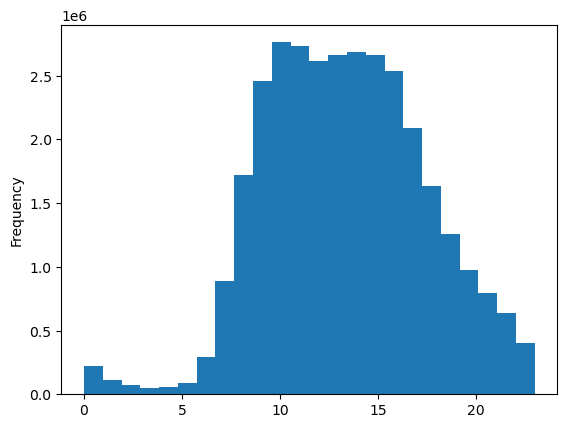

In [40]:
# Create histogram

hist = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)



##### By letting the number of bins in the histogram be 24, each bar represents one hour in the day.
##### The shape of the histogram therefore shows the distribution of orders throughout the day with 
##### the peak occuring at 10am and the majority of the orders being placed between 9am and 5pm.

### 4. Create a bar chart from the loyalty flag 

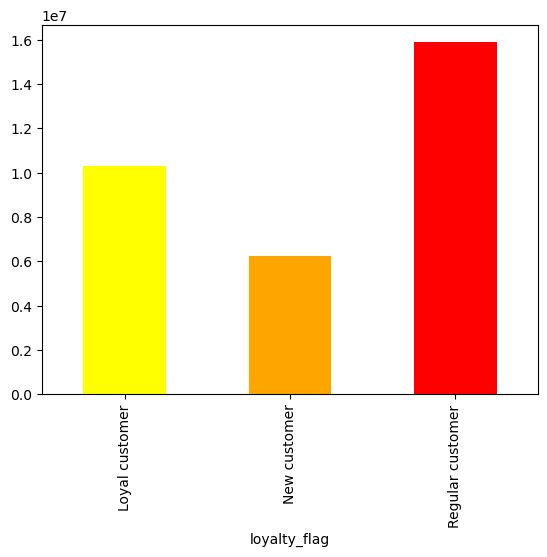

In [12]:
# Create bar chart

bar = ords_prods_cust['loyalty_flag'].value_counts().sort_index().plot.bar(color=['yellow','orange','red'])

### 5. Check whether there's a difference in expenditure depending on the hour of the day

In [15]:
#  We will create a line graph with 'prices' on the vertical axis and 'order_hour_of_day' on the horizontal axis.
#  To do this we need to take a sample of the data.  This will be done by taking 30% of the data.

In [17]:
#  Create a list of True/False boolean values with 70% True and 30% False with as many 
#  values as the data has rows.

np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [18]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [19]:
# Split data set into 70 / 30

big = ords_prods_cust[dev]
small = ords_prods_cust[~dev]

In [22]:
#Check that the data has been split correctly

len(small)/len(ords_prods_cust)*100

29.998889981283362

In [23]:
len(big)/len(ords_prods_cust)*100

70.00111001871664

In [26]:
# Filter data to include only the required columns

df_2 = small[['order_hour_of_day','prices']]

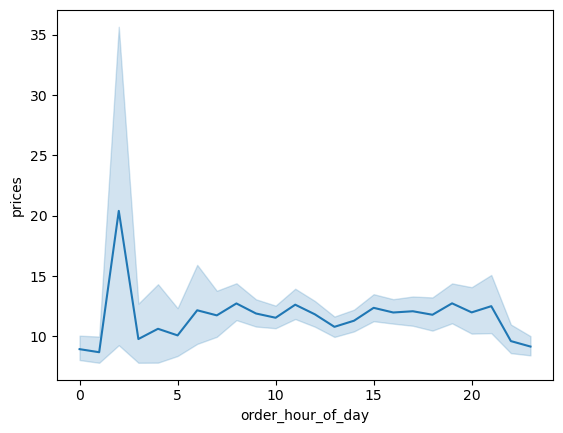

In [27]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

##### It appears that the most expensive items are purchased mainly at 2am.  Funny.

### 6. Connection between age and number_of_dependants

In [30]:
#  We can reuse the sample from before but create a new subset with the columns age and no_of_dependants

df_3 = small[['age','no_of_dependants']]

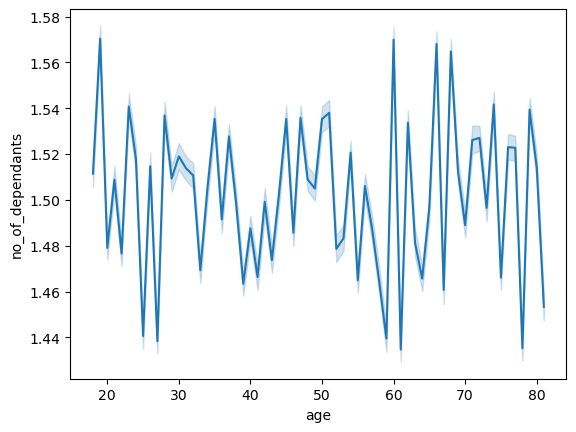

In [31]:
line_2 = sns.lineplot(data = df_3, x = 'age',y = 'no_of_dependants')

##### There doesn't appear to be any strong correlation between age and number of dependants. 

### 7. Connection between age and income

In [38]:
# Create new subset containing only relevant columns
df_4 = small[['age','income']]

In [37]:
# Check summary statistics
df_4.describe()

,age,income
count,9.721098e+06,9.721098e+06
mean,4.946331e+01,9.943371e+04
std,1.848238e+01,4.308613e+04
min,1.800000e+01,2.590300e+04
25%,3.300000e+01,6.699500e+04
50%,4.900000e+01,9.659800e+04
75%,6.500000e+01,1.278920e+05
max,8.100000e+01,5.939010e+05


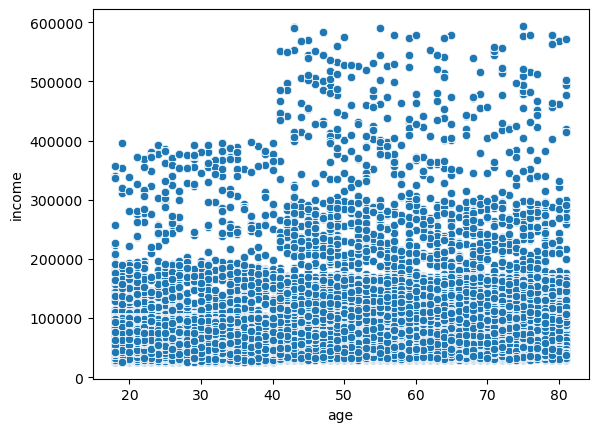

In [39]:
scatter = sns.scatterplot(x = 'age', y = 'income',data = df_4)

##### The scatterplot shows that the majority of customers have an income of less than 200000 with a few customers on higher incomes up to 400000 among those up to age 40.  After the age of 40 the majority of customer still earn under 200000 but there are more higher earners with a few users earning up to 600000.

### 8. Exporting visualisations 

In [42]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_orders_hour_of_day.png'))

In [43]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_loyalty.png'))

In [44]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_orders_hour_of_day_prices.png'))

In [45]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_age_dependants.png'))

In [46]:
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'scatter_age_income.png'))